<a href="https://colab.research.google.com/github/AtaruOhto/google-colab-sandbox/blob/master/xgboost_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

train_data = pd.read_csv("./train.csv")
y = train_data.y.values
train_data = train_data.drop(["id", "y", "contact"], axis=1)

# contact
# job
# poutcome
# loan


train_data["default"] = train_data["default"].map(dict(no=0, yes=1)).astype('int64')
train_data["housing"] = train_data["housing"].map(dict(no=0, yes=1)).astype('int64')
train_data["loan"] = train_data["loan"].map(dict(no=0, yes=1)).astype('int64')
train_data["month"] = train_data["month"].map(dict(jan=1, feb=2, mar=3, apr=4, may=5, jun=6, jul=7, aug=8, sep=9, oct=10, nov=11, dec=12)).astype('int64')
# X = pd.get_dummies(train_data ,columns=['job', "marital", "education", "contact", "poutcome"])
X = pd.get_dummies(train_data ,columns=['job', "marital", "education", "poutcome"])





train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, shuffle=True) 
train_x

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
16982,33,0,5008,1,1,16,5,152,1,329,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
6622,30,0,15568,1,1,4,4,101,1,782,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
14419,31,0,-895,0,0,26,2,158,1,119,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3426,31,0,3488,1,1,27,5,14,3,849,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
20132,31,0,87978,1,0,12,5,345,1,99,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24438,31,0,54048,1,0,27,5,345,3,112,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
16178,37,0,69724,1,0,27,5,755,2,355,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
25920,57,0,86839,0,0,11,8,158,1,813,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4570,32,0,94006,1,1,2,6,52,1,266,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [ ]:
# グリッドサーチ
from sklearn.model_selection import StratifiedKFold, GridSearchCV


params = {
    "eta": [0.01, 0.1, 1.0],
    "gamma": [0, 0.1],
    "n_estimators": [10, 100],
    "max_depth": [2, 4],
    "min_child_weigh": [1, 2],
    "nthread": [2]
}


model = xgb.XGBClassifier()  
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
clf = GridSearchCV(estimator=model, param_grid=params,   
                    cv=skf, scoring="accuracy", n_jobs=1, verbose=3)  
clf.fit(train_x, train_y)  

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[CV]  eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.929, total=   0.2s
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.928, total=   0.2s
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[CV]  eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.925, total=   0.1s
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.929, total=   0.2s
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[CV]  eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.928, total=   0.1s
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[CV]  eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.931, total=   1.0s
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[CV]  eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.929, total=   1.0s
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[CV]  eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.928, total=   1.0s
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[CV]  eta=0.0

In [101]:
# アーリーストッピング
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(test_x, label=test_y)

param = {'max_depth': 2, 
    'eta': 0.2, 
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

evallist = [(dvalid, 'eval'), (dtrain, 'train')]  
num_round = 10000  
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=5) 

[0]	eval-auc:0.670088	train-auc:0.658139
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 5 rounds.
[1]	eval-auc:0.748163	train-auc:0.74971
[2]	eval-auc:0.737184	train-auc:0.743773
[3]	eval-auc:0.7482	train-auc:0.749754
[4]	eval-auc:0.7482	train-auc:0.749752
[5]	eval-auc:0.7482	train-auc:0.749752
[6]	eval-auc:0.757176	train-auc:0.761538
[7]	eval-auc:0.761017	train-auc:0.767709
[8]	eval-auc:0.768847	train-auc:0.774242
[9]	eval-auc:0.771398	train-auc:0.777031
[10]	eval-auc:0.776502	train-auc:0.784512
[11]	eval-auc:0.777161	train-auc:0.784294
[12]	eval-auc:0.778049	train-auc:0.784432
[13]	eval-auc:0.795811	train-auc:0.800964
[14]	eval-auc:0.798541	train-auc:0.809121
[15]	eval-auc:0.800292	train-auc:0.813767
[16]	eval-auc:0.800326	train-auc:0.815508
[17]	eval-auc:0.801959	train-auc:0.813785
[18]	eval-auc:0.803328	train-auc:0.81783
[19]	eval-auc:0.802978	train-auc:0.817599
[20]	eval-auc:0.803518	train-auc:0.8

In [73]:
print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(  
     bst.best_score, bst.best_iteration, bst.best_ntree_limit)) 

Best Score:0.9997, Iteratin:868, Ntree_Limit:869


In [86]:

print(sorted(bst.get_score(), key=bst.get_score().get))
bst.get_score()

# contact
# job
# poutcome
# loan



['poutcome_other', 'job_housemaid', 'contact_telephone', 'job_student', 'job_unemployed', 'job_entrepreneur', 'marital_divorced', 'poutcome_failure', 'job_self-employed', 'job_retired', 'education_unknown', 'contact_unknown', 'education_primary', 'poutcome_unknown', 'loan', 'job_services', 'poutcome_success', 'job_technician', 'job_admin.', 'contact_cellular', 'job_blue-collar', 'job_management', 'education_tertiary', 'previous', 'housing', 'marital_single', 'education_secondary', 'marital_married', 'campaign', 'month', 'duration', 'day', 'age', 'pdays', 'balance']


{'age': 1280,
 'balance': 2976,
 'campaign': 412,
 'contact_cellular': 108,
 'contact_telephone': 19,
 'contact_unknown': 55,
 'day': 1215,
 'duration': 1013,
 'education_primary': 56,
 'education_secondary': 183,
 'education_tertiary': 143,
 'education_unknown': 49,
 'housing': 168,
 'job_admin.': 88,
 'job_blue-collar': 109,
 'job_entrepreneur': 36,
 'job_housemaid': 19,
 'job_management': 131,
 'job_retired': 47,
 'job_self-employed': 46,
 'job_services': 64,
 'job_student': 31,
 'job_technician': 65,
 'job_unemployed': 35,
 'loan': 61,
 'marital_divorced': 42,
 'marital_married': 185,
 'marital_single': 169,
 'month': 644,
 'pdays': 2643,
 'poutcome_failure': 43,
 'poutcome_other': 18,
 'poutcome_success': 65,
 'poutcome_unknown': 58,
 'previous': 157}

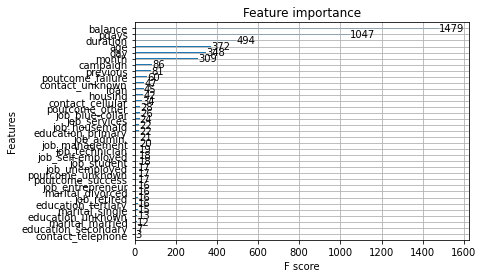

In [99]:
xgb.plot_importance(bst)  